In [1]:
import os
from semantic_seg_model import segmentation_inference
import image_helpers
from PIL import Image
import datasets as ds #import load_dataset
import re
import requests
from io import BytesIO
import torch

c:\Users\josie\Documents\dallESpeckleMap\AI_image_analyzer\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\josie\Documents\dallESpeckleMap\AI_image_analyzer\.venv\Lib\site-packages\transformers\models\segformer\image_processing_segformer.py:103: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [3]:
## Directories

root_directory = "C:/Users/josie/OneDrive - Chalmers/Documents/Speckle hackathon/data/"

test_image_directory = root_directory + "temp_test_image/"
processed_directory = test_image_directory + "processed/"
test_filename = os.listdir(test_image_directory)[1]
test_filename_root = test_filename.split('.')[0] + '_'
processed_filename = "processed/" + test_filename
processed_filename_root = "processed/" + test_filename_root
original_image_filepath = os.path.join(test_image_directory, test_filename)
processed_image_filepath = os.path.join(test_image_directory, processed_filename_root)

In [13]:
# ## Load embedding database (reconstruct for now)

from transformers import AutoModel, AutoFeatureExtractor
import torchvision.transforms as T
# import torch
import random
# import numpy as np

# gold_directory = root_directory + "gold/"
# dataset = ds.load_dataset("imagefolder", data_dir=gold_directory, split="train")
# dataset = dataset.add_column("filenames", os.listdir(gold_directory + 'train/unlabeled/'))

model_ckpt = "nateraw/vit-base-beans" ## FIND DIFFERENT MODEL

extractor = AutoFeatureExtractor.from_pretrained(model_ckpt)
model = AutoModel.from_pretrained(model_ckpt)

# seed = 42
# candidate_dataset = dataset.shuffle(seed=seed)

transformation_chain = T.Compose(
    [
        # We first resize the input image to 256x256 and then we take center crop.
        T.Resize(int((256 / 224) * extractor.size["height"])),
        T.CenterCrop(extractor.size["height"]),
        T.ToTensor(),
        T.Normalize(mean=extractor.image_mean, std=extractor.image_std),
    ]
)

# # Here, we map embedding extraction utility on our subset of candidate images.
# batch_size = 24
device = "cuda" if torch.cuda.is_available() else "cpu"
# extract_fn = image_helpers.extract_embeddings(transformation_chain, model.to(device))
# candidate_subset_emb = candidate_dataset.map(extract_fn, batched=True, batch_size=24)
candidate_subset_emb = ds.load_dataset("canadianjosieharrison/2024hackathonembeddingdb")['train']

candidate_ids = []

for id in range(len(candidate_subset_emb)):
    # Create a unique indentifier.
    entry = str(id) + "_" + str(random.random()).split('.')[1]

    candidate_ids.append(entry)

# all_candidate_embeddings = np.array(candidate_subset_emb["embeddings"])
# all_candidate_embeddings = torch.from_numpy(all_candidate_embeddings)

# # Save embeddings

c:\Users\josie\Documents\dallESpeckleMap\AI_image_analyzer\.venv\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at nateraw/vit-base-beans and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
# ## Save embeddings and load

# candidate_subset_emb.push_to_hub("canadianjosieharrison/2024hackathonembeddingdb")


# with open("C:/Users/josie/OneDrive - Chalmers/Documents/Speckle hackathon/data/materials/embedding_db.pkl", "wb") as f:
#     pickle.dump(candidate_subset_emb, f)
pt_directory = root_directory + "materials/embedding_db.pt"
# # torch.save(all_candidate_embeddings, pt_directory)

# with open("C:/Users/josie/OneDrive - Chalmers/Documents/Speckle hackathon/data/materials/embedding_db.pkl") as f:
#     all_candidate_embeddings = pickle.load(f)
all_candidate_embeddings = torch.load(pt_directory, map_location=torch.device('cpu'), weights_only=True)

In [9]:
## Process test image

input_image = Image.open(original_image_filepath)

# Segment into parts
segmentation_inference(input_image, savepath=processed_image_filepath)

# Convert images to grayscale
image_helpers.convert_images_to_grayscale(processed_directory)

# Crop to the largest contour
image_helpers.crop_center_largest_contour(processed_directory)

Similar material patches for ceiling
https://cdn.polyhaven.com/asset_img/thumbs/leather_white.png?width=256&height=256


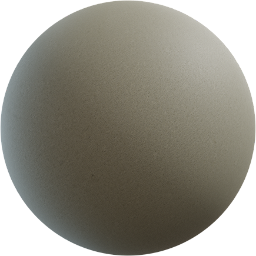

https://cdn.polyhaven.com/asset_img/thumbs/preconcrete_wall_001_long.png?width=256&height=256


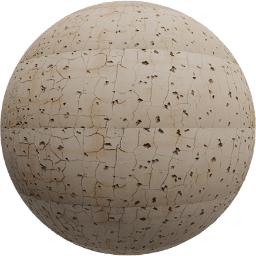

https://cdn.polyhaven.com/asset_img/thumbs/snow_04.png?width=256&height=256


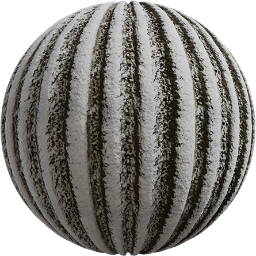

https://cdn.polyhaven.com/asset_img/thumbs/container_side.png?width=256&height=256


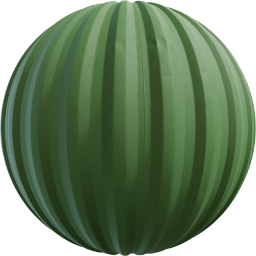

https://cdn.polyhaven.com/asset_img/thumbs/embedded_rock_floor.png?width=256&height=256


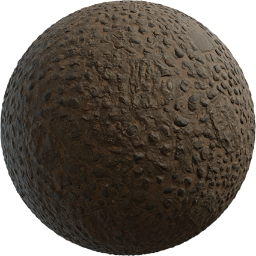


Similar material patches for floor
https://cdn.polyhaven.com/asset_img/thumbs/wood_planks.png?width=256&height=256


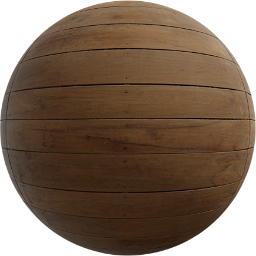

https://cdn.polyhaven.com/asset_img/thumbs/wood_stone_pathway.png?width=256&height=256


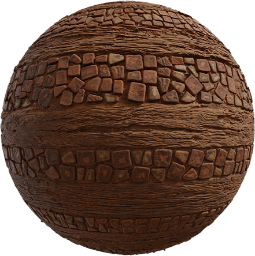

https://cdn.polyhaven.com/asset_img/thumbs/diagonal_parquet.png?width=256&height=256


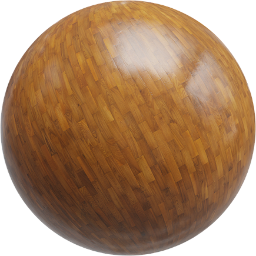

https://cdn.polyhaven.com/asset_img/thumbs/denim_fabric.png?width=256&height=256


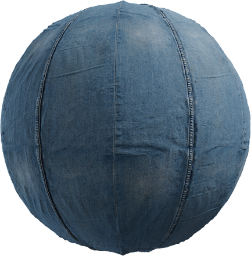

https://cdn.polyhaven.com/asset_img/thumbs/planks_brown_10.png?width=256&height=256


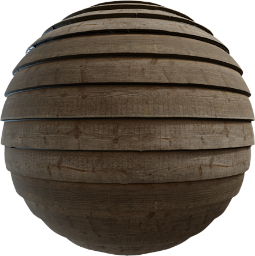


Similar material patches for wall
https://cdn.polyhaven.com/asset_img/thumbs/square_tiles.png?width=256&height=256


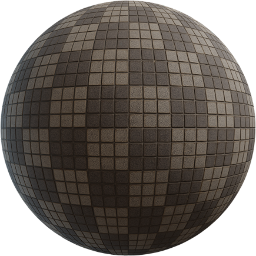

https://cdn.polyhaven.com/asset_img/thumbs/leather_white.png?width=256&height=256


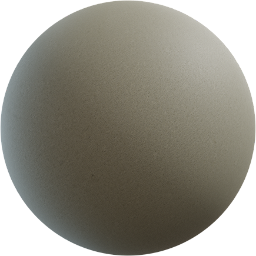

https://cdn.polyhaven.com/asset_img/thumbs/pavement_04.png?width=256&height=256


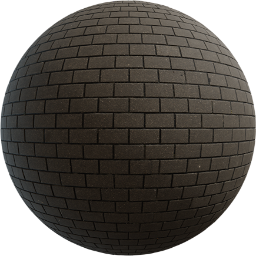

https://cdn.polyhaven.com/asset_img/thumbs/patterned_brick_wall.png?width=256&height=256


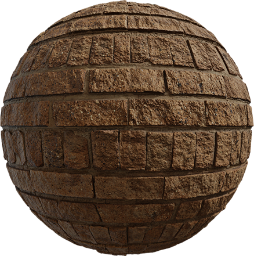

https://cdn.polyhaven.com/asset_img/thumbs/patterned_brick_floor.png?width=256&height=256


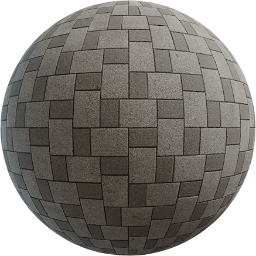

In [14]:
## Load processed test images and show similar material patches

test_ds = ds.load_dataset("imagefolder", data_dir=processed_directory)
label_filenames = ds.load_dataset("imagefolder", data_dir=processed_directory).cast_column("image", ds.Image(decode=False))

for i, each_component in enumerate(test_ds['train']):
    query_image = each_component["image"]
    component_label = label_filenames['train'][i]['image']['path'].split('_')[-1]
    component_label = re.match(r"([a-zA-Z]+)\d*\.png", component_label).group(1)
    print("Similar material patches for", component_label)
    sim_ids = image_helpers.fetch_similar(query_image, transformation_chain, device, model, all_candidate_embeddings, candidate_ids)
    for each_match in sim_ids:
        texture_filename = candidate_subset_emb[each_match]['filenames']
        image_url = f'https://cdn.polyhaven.com/asset_img/thumbs/{texture_filename}?width=256&height=256'
        print(image_url)
        response = requests.get(image_url)
        response.raise_for_status()  # Ensure the request was successful
        img = Image.open(BytesIO(response.content))
        display(img)
    print()
    